#### **UBER SUPPLY DEMAND GAP - DA/BA**



**Major issue impacting Uber's business are :**
  * Cancellation of rides going towards the airport were then the regular trips.
  * Trip to and from an airport resulted in high consumption fuel and time. Hence, a trip back to the city with out rider is not economically beneficial for the driver.
  * Due to high varience in flight arrivals (Higher during evening and late  night hours) the driver idel time is higher in morning. As a result no car are  available during peak night hours because working hours end for majority of drivers at night.

Exploratory data analysis is done on masked dataset to draw some useful insight from the data using standard python library like:
* PANDAS
* NUMPY
* MATPLOTLIB
* SEABORN

As a part of EDA I have followed some steps:
* Data Extraction:
  * Load the data set and inspect different features.
* Data Cleaning:
  * Correcting the datetime formates and filling the missing values.
* Feature Engineering:
  * Determine the new features to getting the insights from the dataset.
* Plotting:
  * Create plot to see the correlation between data points and draw important insight out of data.

#### **DATA EXTRACTION**

In [1]:
# import useful library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set
df = pd.read_csv('/content/Uber Request Data.csv')

In [3]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [4]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [6]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [8]:
df.dtypes

,0
Request id,int64
Pickup point,object
Driver id,float64
Status,object
Request timestamp,object
Drop timestamp,object


Here we can see that 'Request timestamp' and 'Drop timestamp' are not in consistent date time formate.





#### **DATA CLEANING**

Checking for duplicate rows

In [9]:
sum(df.duplicated(subset = 'Request id')) == 0

True

Checking dimensions of data frame.

In [10]:
df.shape

(6745, 6)

Checing null value in the data set

In [11]:
print(df.isnull().sum())
print('----  HAVING NUMBER OF NULL VALUES:')
print(df.isnull().values.any())
print(df.isnull().values.sum())


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64
----  HAVING NUMBER OF NULL VALUES:
True
6564


Now calculation null percentages column wise

In [12]:
pd.DataFrame(round ((100* (df.isnull().sum() / len(df.index))), 2))

,0
Request id,0.00
Pickup point,0.00
Driver id,39.29
Status,0.00
Request timestamp,0.00
Drop timestamp,58.03


Here, we can see that 'Drop timestamp' and 'Driver id' have considerable null values. These entries are probably the rides where trip was never assigned to a driver and it was not completed  (Status- 'No car available').

In [13]:
# Calculating count of row wise null values
pd.DataFrame(df.isnull().sum(axis = 1))

,0
0,0
1,0
2,0
3,0
4,0
...,...
6740,2
6741,2
6742,2
6743,2


In [14]:
# Converting format of Request timestamp and Drop timestamp columns on datetime object.
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], format='mixed', dayfirst=True)
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], format='mixed', dayfirst=True)
df[['Request id','Request timestamp','Drop timestamp']].head(5)

,Request id,Request timestamp,Drop timestamp
0,619,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,2016-07-13 08:33:16,2016-07-13 09:25:47


In [15]:
df['Request timestamp'].max()

Timestamp('2016-07-15 23:59:58')

Checking validity of types of other columns in the data set.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


#### **FEATURE ENGINEERING**

Adding new columns 'Request Hours' and 'Drop Hours' in the data set by extracting hours from 'Request timestamp' and 'Drop timestamp' columns.

In [17]:
df['Request Hours'] = df['Request timestamp'].apply(lambda x: x.hour)
df['Drop Hours'] = df['Drop timestamp'].apply(lambda x: x.hour)
df[['Request id','Request timestamp','Drop timestamp','Request Hours','Drop Hours']].head(5)

,Request id,Request timestamp,Drop timestamp,Request Hours,Drop Hours
0,619,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0
1,867,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0
2,1807,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0
3,2532,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0
4,3112,2016-07-13 08:33:16,2016-07-13 09:25:47,8,9.0


**Adding new column Request Time Slot to each request according to the time range in below:**
* [0 hours - 8 hours] -> Early Morning Hours
* [8 hours - 12 hours] -> Peak Morning Hours
* [12 hours - 17 hours] -> Noon Hours
* [17 hours - 21 hours] -> Eveing Hours
* [21 hours < ] -> Night Hours

In [18]:
def determine_time_slot(x):
  if x >= 0 and x <= 8:
    return 'Early Morning Hours'
  elif x >= 8 and x <= 12:
    return 'Peak Morning Hours'
  elif x >= 12 and x <= 17:
    return 'Noon Hours'
  elif x >= 17 and x <= 21:
    return 'Evening Hours'
  else:
    return 'Night Hours'

df['Request Time Slot'] = df['Request Hours'].apply(determine_time_slot)
df[['Request id','Pickup point','Request timestamp','Request Hours','Request Time Slot']].head(5)

,Request id,Pickup point,Request timestamp,Request Hours,Request Time Slot
0,619,Airport,2016-07-11 11:51:00,11,Peak Morning Hours
1,867,Airport,2016-07-11 17:57:00,17,Noon Hours
2,1807,City,2016-07-12 09:17:00,9,Peak Morning Hours
3,2532,Airport,2016-07-12 21:08:00,21,Evening Hours
4,3112,City,2016-07-13 08:33:16,8,Early Morning Hours


In [19]:
# Now count number of each Request time slot.
df['Request Time Slot'].value_counts()

,count
Request Time Slot,
Early Morning Hours,2250
Evening Hours,1924
Noon Hours,1044
Peak Morning Hours,1029
Night Hours,498


Here we see maximum requests were made in Early Morning Hours and Evening Hours.

#### **PLOTTING AND OBSERVATIONS**

**Ploting Request Hours to see the trends of the request during different hours of the day for each status.**

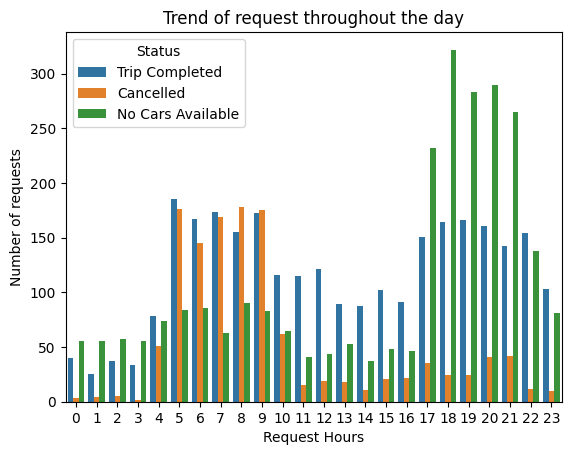

In [20]:
sns.countplot(x = 'Request Hours', hue = 'Status', data = df)
plt.title('Trend of request throughout the day')
plt.ylabel('Number of requests')
plt.xlabel('Request Hours')
plt.show()

Plotting Status column for determining frequency of Trip Cancel, No car Available, Trip completed status.

Text(0, 0.5, 'Trip count')

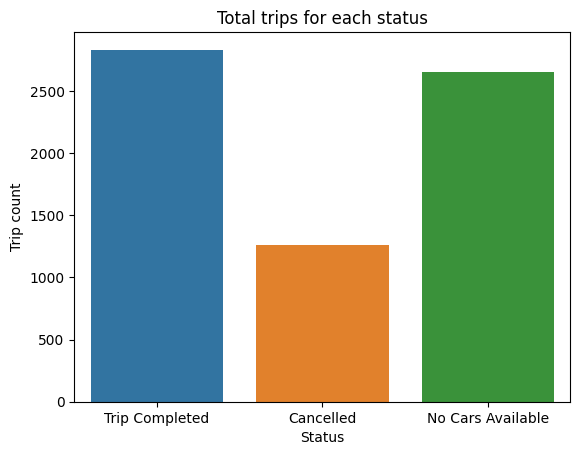

In [21]:
sns.countplot(x ='Status',data = df, hue = 'Status')
plt.title('Total trips for each status')
plt.ylabel('Trip count')


The above count pot says that almost an equal no of request ends with the status of either No cars Available or Trip Completed.  

**Now Determine the most problematic pickup point for all request status.**

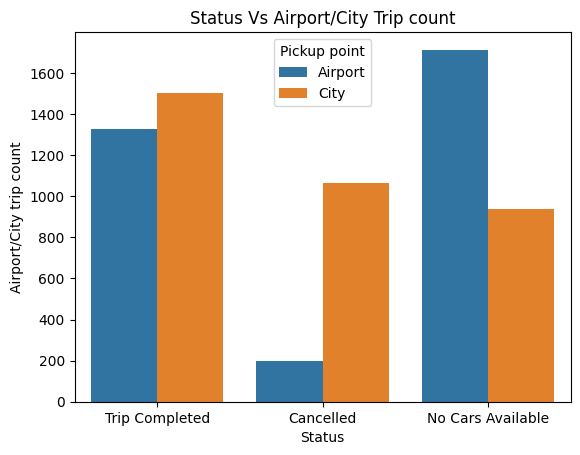

In [22]:
sns.countplot(x = 'Status', hue = 'Pickup point', data = df)
plt.title('Status Vs Airport/City Trip count')
plt.ylabel('Airport/City trip count')
plt.show()

* **No Car Available** :- Between 1600 - 1700 no. of trips where pickup point is 'AIRPORT' uber customers didn't get the car.
* **Trip Completed** :- Between 1400 - 1500 no. of trips completed where pickup point is CITY and around 1300 trips were completed for AIRPORT pickup point.
* **Cancelled** :- Between 1000 - 1050 no. of trips were cancelled as well where pickup point is city which is a little less then trips completed where pickup point is city.

**Now Determine the Time slots when maximum trips were completed / cancelled / no car available.**

Text(0.5, 0, 'Status count')

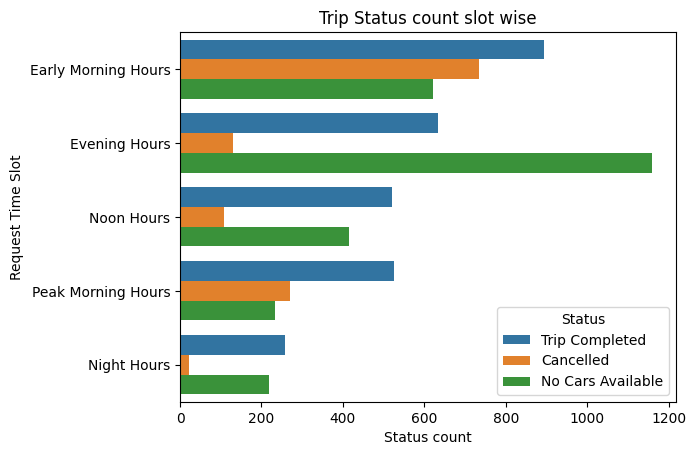

In [23]:
sns.countplot(y = 'Request Time Slot', hue = 'Status', data = df, order = df['Request Time Slot'].value_counts().index)
plt.title('Trip Status count slot wise')
plt.ylabel('Request Time Slot')
plt.xlabel('Status count')


KEY HIGHLIGHTS FROM THE ABOVE COUNT PLOT:
* **Early Morning Hours(1am-8am):** Approx 800-900 no. of trips completed, and also 700-800 no. of trips cancel or car were not available.
* **Peak Morning Hours(8am-12pm):** More than 500+ no. of trips completed.
* **Evening Hours(5pm-9pm):** No. of requests between 1000-1200 ended with no car available.

**To Analyze plots for each trip status, creating individual data frames.**

In [24]:
df_nocars = df[(df['Status'] == 'No Cars Available')]
df_tripcmplt = df[(df['Status'] == 'Trip Completed')]
df_tripcancel = df[(df['Status'] == 'Cancelled')]

NO CAR AVAILABLE: AIRPORT AND CITY PICKUP POINT COUNTS FOR ALL TIME SLLOT.

Text(0.5, 0, 'Airport/City trip count')

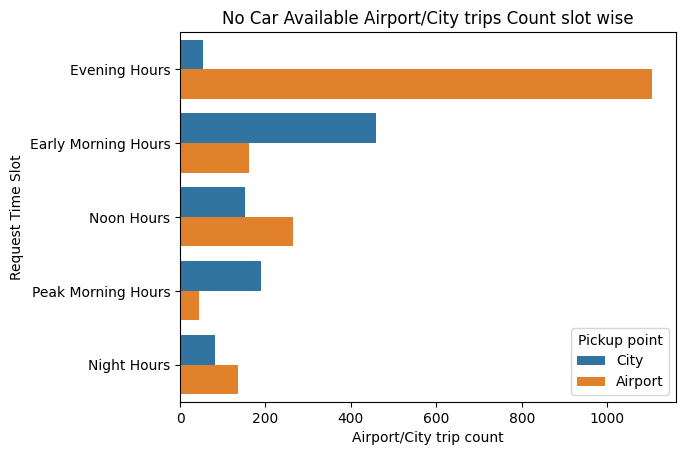

In [25]:
sns.countplot(y = 'Request Time Slot', hue = 'Pickup point', data = df_nocars, order = df_nocars['Request Time Slot'].value_counts().index)
plt.title('No Car Available Airport/City trips Count slot wise')
plt.ylabel('Request Time Slot')
plt.xlabel('Airport/City trip count')

* For Airport pickup during evening hours(5pm-9pm)  maximum request ended up with no cars available (1100-1200).
* For city pickup during early  morning hours(1am-8am) maximum request ended up with no cars avilable (350-400).

**NOW COUNT OF AIRPORT RIDES IN EVENING HOURS WHERE CARS ARE NOT AVAILABLE.**

In [26]:
df_nocars_airport = df_nocars.loc[(df_nocars['Pickup point'] == 'Airport') & (df_nocars['Request Time Slot'] == 'Evening Hours')]
len(df_nocars_airport.index)

1106

**NOW COUNT OF CITY RIDES IN EVENING HOURS WHERE CARS ARE NOT AVAILABLE.**

In [27]:
df_nocars_city = df_nocars.loc[(df_nocars['Pickup point'] == 'City') & (df_nocars['Request Time Slot'] == 'Early Morning Hours')]
len(df_nocars_city.index)

460

TRIP COMPLETED: AIRPORT AND CITY PICKUP POINTS COUNTS FOR ALL TIME SLOT.

Text(0.5, 0, 'Airport/City trip count')

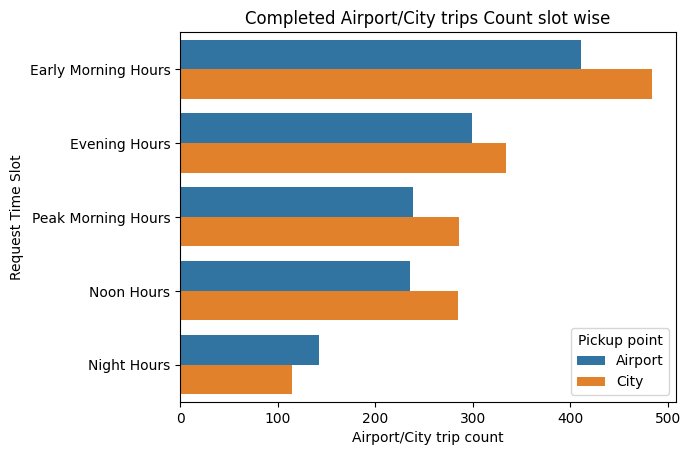

In [28]:
sns.countplot(y = 'Request Time Slot', hue = 'Pickup point', data = df_tripcmplt, order = df_tripcmplt['Request Time Slot'].value_counts().index)
plt.title('Completed Airport/City trips Count slot wise')
plt.ylabel('Request Time Slot')
plt.xlabel('Airport/City trip count')

* For city pickups maximum trips were completed during early morning hours (1am-8am) approx 500.
* For airport pickups maximum trips were complete during early morning hours only (1am-8am) approx 410.

**Now Counts of city rides in early morning hours where trips were completed**

In [29]:
df_tripcmplt_city = df_tripcmplt.loc[(df_tripcmplt['Pickup point'] == 'City') & (df_tripcmplt['Request Time Slot'] == 'Early Morning Hours')]
len(df_tripcmplt_city.index)

484

**Now Counts of airport rides in early morning hours where trips were completed.**

In [30]:
df_tripcmplt_airport = df_tripcmplt.loc[(df_tripcmplt['Pickup point'] == 'Airport') & (df_tripcmplt['Request Time Slot'] == 'Early Morning Hours')]
len(df_tripcmplt_airport.index)

411

CANCELLED: AIRPORT AND CITY PICKUP POINTS COUNTS FOR ALL TIME SLOTS.

Text(0.5, 0, 'Airport/City trip count')

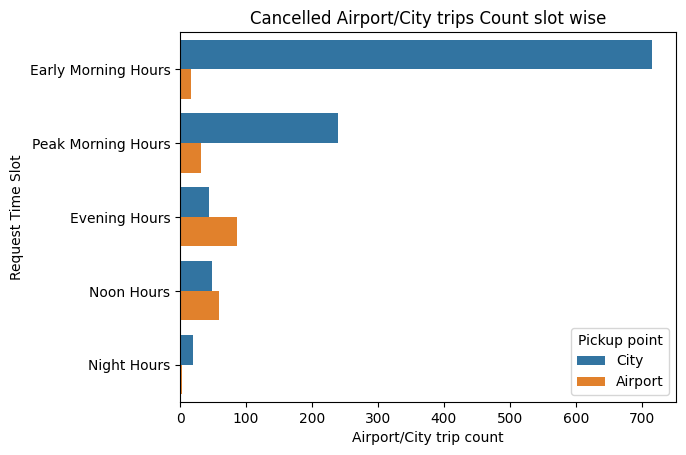

In [31]:
sns.countplot(y = 'Request Time Slot', hue = 'Pickup point', data = df_tripcancel, order = df_tripcancel['Request Time Slot'].value_counts().index)
plt.title('Cancelled Airport/City trips Count slot wise')
plt.ylabel('Request Time Slot')
plt.xlabel('Airport/City trip count')

* For city pickup maximum trips were canceled during early morning hours of 1am-8am (Approx 700-750).
* For airport pickups maximum trips were canceled during evening hours of 5pm-9pm (Approx 80-100).

**Now Count of city rides in early morning hours where request were cancelled by drivers.**

In [32]:
df_cancelled_city = df_tripcancel.loc[(df_tripcancel['Pickup point'] == 'City') & (df_tripcancel['Request Time Slot'] == 'Early Morning Hours')]
len(df_cancelled_city.index)

716

**Now Count f airport rides in early morning hours where request were cancelled by drivers.**

In [33]:
df_cancelled_airport = df_tripcancel.loc[(df_tripcancel['Pickup point'] == 'Airport') & (df_tripcancel['Request Time Slot'] == 'Evening Hours')]
len(df_cancelled_airport.index)

87

#### **Total Requests for each trip status:**

In [34]:
print('Total requests where cars were NOT AVAILABLE: ' + str(len(df_nocars.index)))
print('Total requests where trips were COMPLETED: ' + str(len(df_tripcmplt.index)))
print('Total requests where trips were CANCELLED: ' + str(len(df_tripcancel.index)))

Total requests where cars were NOT AVAILABLE: 2650
Total requests where trips were COMPLETED: 2831
Total requests where trips were CANCELLED: 1264




> **Calculating demand supply matrics**



* **Total Demand:** Total trips made with all three status.
* **Total Supply:** Total number of trips completed.
* **Gap:** Difference between demand and supply.

In [35]:
demand = len(df_nocars.index) + len(df_tripcmplt.index) + len(df_tripcancel.index)
print('Total Demand: ' + str(demand))
supply = len(df_tripcmplt.index)
print('Total Supply: ' + str(supply))
gap = demand - supply
print('Total Gap: '+ str(gap))

Total Demand: 6745
Total Supply: 2831
Total Gap: 3914


Plotting number of requests for each request time slot te see the demand accros the time slot.

Text(0.5, 0, 'Demand count')

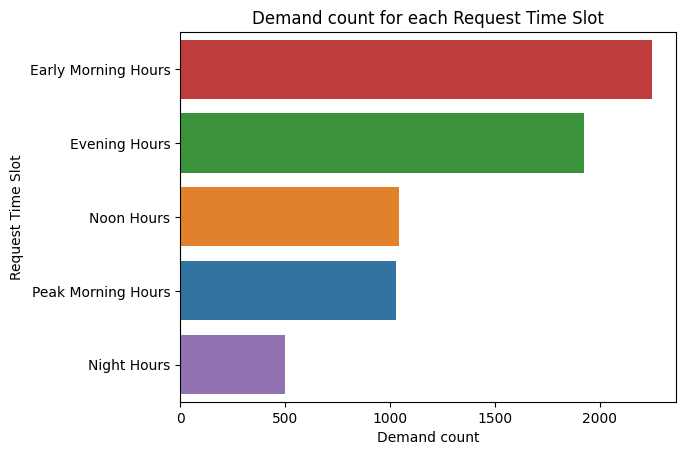

In [36]:
sns.countplot(y = 'Request Time Slot', hue='Request Time Slot', data = df, order = df['Request Time Slot'].value_counts().index)
plt.title('Demand count for each Request Time Slot')
plt.ylabel('Request Time Slot')
plt.xlabel('Demand count')

Demand for all time slots:
* 0-8 - Early Morning hours - approx 2500-2600.
* 8-12 - Peak Morning hours - approx 1000-1200.
* 12-17 - Noon hours - approx 1000-1250.
* 17-21 - Evening hours - approx 1900-1950.
* 21-23 - Night hours - approx 480-500  

In [37]:
len(df.loc[(df['Request Time Slot'] == 'Evening Hours')].index)

1924

In [38]:
len(df.loc[(df['Request Time Slot'] == 'Early Morning Hours')].index)

2250

Here we can infer that, Maximum demand during early morning and evening hours time slots.

**Plotting number of requests for each time slot only where trip was completed.**

Text(0.5, 0, 'Supply count')

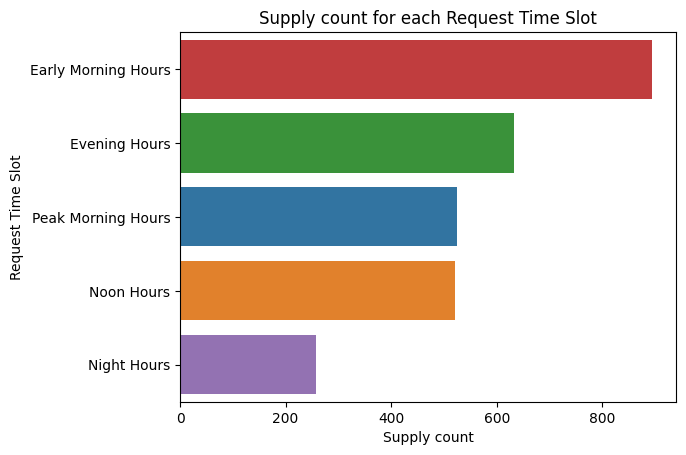

In [39]:
sns.countplot(y ='Request Time Slot', data = df_tripcmplt, hue = 'Request Time Slot', order = df_tripcmplt['Request Time Slot'].value_counts().index)
plt.title('Supply count for each Request Time Slot')
plt.ylabel('Request Time Slot')
plt.xlabel('Supply count')

Supply for all time slots:
* 0-8 - Early Morning hours - Approx 850-900.
* 8-12 - Peak morning hours - Approx 500-550.
* 12-15 - Noon hours - Approx 500-550.
* 15-21 - Evening hours - Approx 630-650.
* 21-23 - Night hours - Approx 220-300.

In [40]:
len(df_tripcmplt.loc[(df_tripcmplt['Request Time Slot'] == 'Early Morning Hours')].index)

895

In [41]:
len(df_tripcmplt.loc[(df_tripcmplt['Request Time Slot'] == 'Evening Hours')].index)

633

Here we  can infer that, Maximum supply in early morning hours 1am-8am.

 # **From the above plots we can conclude that their in an imbalance between demand and supply. Hence , Now calculating demand-supply matrics for both airport and city requests for all requests time slots.**

So I Create two separate data frame for Airport and City rides.

In [42]:
df_airport_request = df.loc[(df['Pickup point'] == 'Airport')]
df_city_request = df.loc[(df['Pickup point'] == 'City')]

In [43]:
def calculateDemandSupply(dataframe,timeSlot):
  demand = len(dataframe.loc[(dataframe['Request Time Slot'] == timeSlot)].index)
  supply = len(df_tripcmplt.loc[(df_tripcmplt['Request Time Slot'] == timeSlot)].index)
  gap = demand - supply
  return demand,supply,gap

**Demand-Supply metrics for airport rides for all time slots.**

In [44]:
demand_earlymornig_a,supply_earlymornig_a,gap_earlymornig_a = calculateDemandSupply(df_airport_request,'Early Morning Hours')
demand_peakmorning_a,supply_peakmorning_a,gap_peakmorning_a = calculateDemandSupply(df_airport_request,'Peak Morning Hours')
demand_noon_a,supply_noon_a,gap_noon_a = calculateDemandSupply(df_airport_request,'Noon Hours')
demand_evening_a,supply_evening_a,gap_evening_a = calculateDemandSupply(df_airport_request,'Evening Hours')
demand_night_a,supply_night_a,gap_night_a = calculateDemandSupply(df_airport_request,'Night Hours')

**Demand-Supply metrics for city rides for all time slots.**

In [45]:
demand_earlymornig_c,supply_earlymornig_c,gap_earlymornig_c = calculateDemandSupply(df_city_request,'Early Morning Hours')
demand_peakmorning_c,supply_peakmorning_c,gap_peakmorning_c = calculateDemandSupply(df_city_request,'Peak Morning Hours')
demand_noon_c,supply_noon_c,gap_noon_c = calculateDemandSupply(df_city_request,'Noon Hours')
demand_evening_c,supply_evening_c,gap_evening_c = calculateDemandSupply(df_city_request,'Evening Hours')
demand_night_c,supply_night_c,gap_night_c = calculateDemandSupply(df_city_request,'Night Hours')

**Now Calculating Total Demand and Supply for all time slots.**

In [46]:
# TOTAL DEMAND
demand_earlymorning = demand_earlymornig_a + demand_earlymornig_c
demand_peakmorning = demand_peakmorning_a + demand_peakmorning_c
demand_noon = demand_noon_a + demand_noon_c
demand_evening = demand_evening_a + demand_evening_c
demand_night = demand_night_a + demand_night_c

# TOTAL SUPPLY
supply_earlymorning = supply_earlymornig_a + supply_earlymornig_c
supply_peakmorning = supply_peakmorning_a + supply_peakmorning_c
supply_noon = supply_noon_a + supply_noon_c
supply_evening = supply_evening_a + supply_evening_c
supply_night = supply_night_a + supply_night_c

# TOTAL GAP
gap_earlymorning = gap_earlymornig_a + gap_earlymornig_c
gap_peakmorning = gap_peakmorning_a + gap_peakmorning_c
gap_noon = gap_noon_a + gap_noon_c
gap_evening = gap_evening_a + gap_evening_c
gap_night = gap_night_a + gap_night_c

**Plottng count of tripfor all request time slot corresponding to Airport and City pickup points.**

Text(0, 0.5, 'Airport/City Request count')

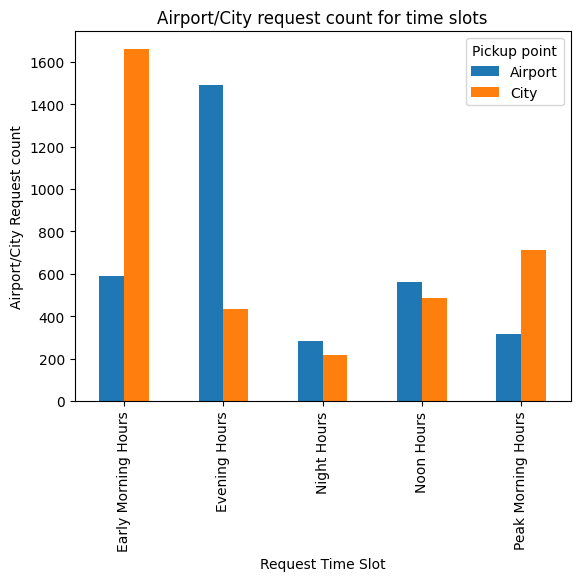

In [47]:
df.groupby(['Request Time Slot','Pickup point']).size().unstack().plot(kind ='bar',stacked =False)
plt.title('Airport/City request count for time slots')
plt.ylabel('Airport/City Request count')


* Maximun trip request from city were made in early morning hours.
* Maximum trip request from airport were made in evening hours.

**Now creating a new gap data frame with demand- supply counts for all time slots.**

In [48]:
gap_data = {'Request Time Slot':['Early Morning','Peak Morning','Noon','Evening','Night'],
            'Total Demand':[demand_earlymorning,demand_peakmorning,demand_noon,demand_evening,demand_night],
            'Total Supply':[supply_earlymorning,supply_peakmorning,supply_noon,supply_evening,supply_night],
            'Total Gap':[gap_earlymorning,gap_peakmorning,gap_noon,gap_evening,gap_night],
            'Demand_From_Airport':[demand_earlymornig_a,demand_peakmorning_a,demand_noon_a,demand_evening_a,demand_night_a],
            'Demand_From_City':[demand_earlymornig_c,demand_peakmorning_c,demand_noon_c,demand_evening_c,demand_night_c],
            'Supply_From_Airport':[supply_earlymornig_a,supply_peakmorning_a,supply_noon_a,supply_evening_a,supply_night_a],
            'Supply_From_City':[supply_earlymornig_c,supply_peakmorning_c,supply_noon_c,supply_evening_c,supply_night_c],
            'Gap_From_Airport':[gap_earlymornig_a,gap_peakmorning_a,gap_noon_a,gap_evening_a,gap_night_a],
            'Gap_From_City':[gap_earlymornig_c,gap_peakmorning_c,gap_noon_c,gap_evening_c,gap_night_c]}
gap_df = pd.DataFrame(data = gap_data)
gap_df



,Request Time Slot,Total Demand,Total Supply,Total Gap,Demand_From_Airport,Demand_From_City,Supply_From_Airport,Supply_From_City,Gap_From_Airport,Gap_From_City
0,Early Morning,2250,1790,460,590,1660,895,895,-305,765
1,Peak Morning,1029,1050,-21,315,714,525,525,-210,189
2,Noon,1044,1042,2,560,484,521,521,39,-37
3,Evening,1924,1266,658,1492,432,633,633,859,-201
4,Night,498,514,-16,281,217,257,257,24,-40


Here, A negative gap indicates an excess of supply in the system, meaning there are more cars (supply) available than there are customers requesting rides (demand) during that time. Conversely, a positive gap indicates a shortage, or an excess of demand.

In [49]:
gap_df[['Request Time Slot','Total Demand','Total Supply','Gap_From_City']].sort_values('Gap_From_City',ascending = False)

,Request Time Slot,Total Demand,Total Supply,Gap_From_City
0,Early Morning,2250,1790,765
1,Peak Morning,1029,1050,189
2,Noon,1044,1042,-37
4,Night,498,514,-40
3,Evening,1924,1266,-201


In [50]:
gap_df[['Request Time Slot','Total Demand','Total Supply','Gap_From_Airport']].sort_values('Gap_From_Airport',ascending = False )

,Request Time Slot,Total Demand,Total Supply,Gap_From_Airport
3,Evening,1924,1266,859
2,Noon,1044,1042,39
4,Night,498,514,24
1,Peak Morning,1029,1050,-210
0,Early Morning,2250,1790,-305


**Plotting demad-supply gap for all requests time slots.**

Text(0.5, 9.444444444444438, 'Total Gap')

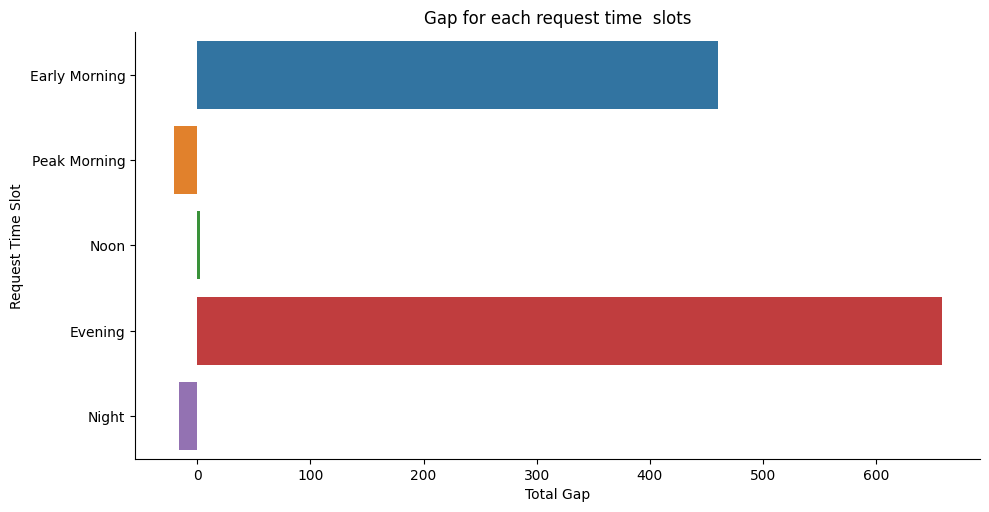

In [51]:
sns.catplot(x = 'Total Gap', y = 'Request Time Slot', hue = 'Request Time Slot', kind = 'bar', data = gap_df, height = 5, aspect = 2)
plt.title('Gap for each request time  slots')

plt.xlabel('Total Gap')


* **Largest Gap (Highest Demand):** The Evening time slot has the largest positive gap, indicating the highest unmet demand. This suggests a significant shortage of available cars during the evening.
* **Second Largest Gap:** The Early Morning time slot has the second-largest positive gap, pointing to a considerable demand-supply imbalance as well.
* **Negative Gap:** The plot shows that the  peak morning,Night time, noon time  slot has a negative gap (although it is small), which means there is a slight excess of supply over demand during this period.

**VISUALIZING GAP DIFFERENTIATED BY PICKUP POINTS AND ALL TIME SLOTS.**

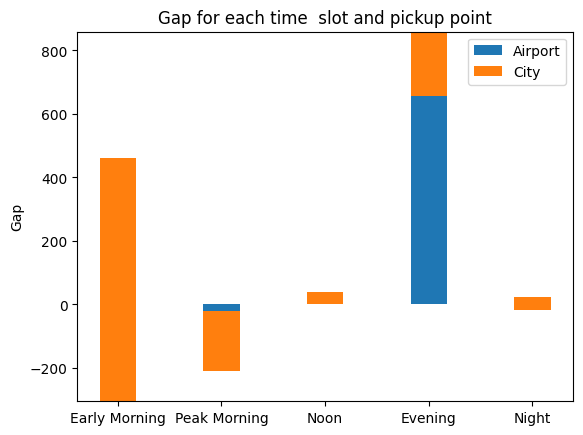

In [52]:
labels = gap_df['Request Time Slot']
gap_airport = gap_df['Gap_From_Airport']
gap_city = gap_df['Gap_From_City']
#x = np.arange(len(labels))
width = 0.35 # The width of the bars : can also be len(x) sequence.

fig, ax = plt.subplots()
ax.bar(labels, gap_airport, width, label='Airport')
ax.bar(labels, gap_city, width, bottom=gap_airport, label='City')

ax.set_ylabel('Gap')
ax.set_title('Gap for each time  slot and pickup point')
ax.legend()

plt.show()

Here we clearly see that gap is maximum for Airport rides in evening hours and for city rides in early morning hours.

**Now Plotting demand  and supply for all time slots as calculated in gap_df dataframe.**

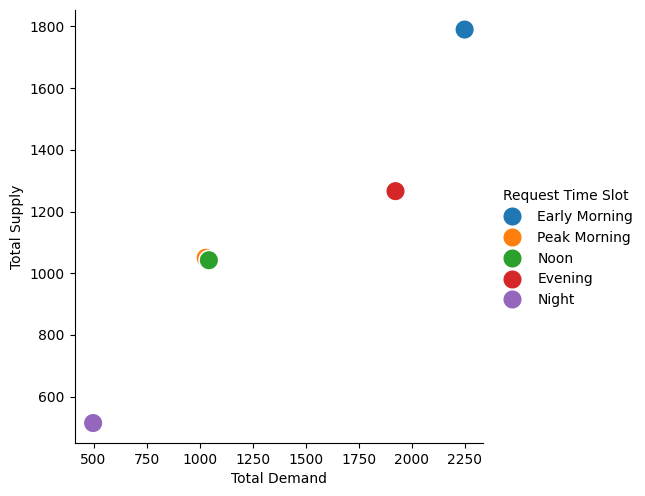

In [53]:
demandVsGap = sns.pairplot(gap_df,x_vars ='Total Demand',y_vars = 'Total Supply', hue = 'Request Time Slot', plot_kws = {'alpha':1,'s':200}, height = 5)

**Demand-Supply Imbalance:**

* Evening: This time slot has the highest demand and the highest supply, but the supply is significantly lower than the demand, indicating a severe shortage of cars. The large distance between the demand and supply for this point highlights a major gap.

* Early Morning: This slot also shows a substantial demand-supply gap. While both demand and supply are lower than in the evening, the demand greatly exceeds the supply, indicating a significant shortage.

* Peak Morning & Noon: These time slots are the most balanced. The data points for these periods are closest to the diagonal line where demand would equal supply, suggesting a relatively good match between the number of customers and the number of available cars.

* Night: This time slot has the lowest demand and lowest supply, and the supply appears to be slightly higher than the demand. This indicates a slight surplus of cars.

**Plotting demand-supply for city to airport rides.**

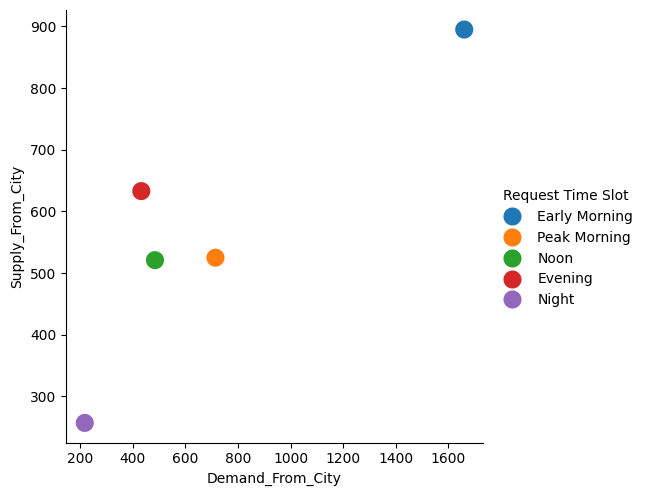

In [54]:
cityVsGap = sns.pairplot(gap_df,x_vars ='Demand_From_City',y_vars = 'Supply_From_City', hue = 'Request Time Slot', plot_kws = {'alpha':1,'s':200}, height = 5)

* The plot reveals that the company struggles to provide enough cars from the city during peak hours, specifically in the Evening and Early Morning. As demand increases, supply doesn't keep pace, creating a widening gap.

* This suggests that a large portion of the 'No Car Available' issues are likely related to riders trying to leave the city during these times.

**Plotting demand-supply for airport to city rides.**

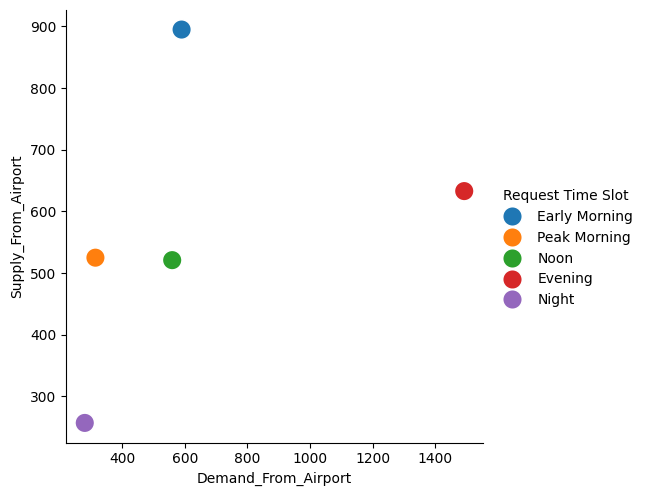

In [55]:
airportVsGap = sns.pairplot(gap_df,x_vars ='Demand_From_Airport',y_vars = 'Supply_From_Airport', hue = 'Request Time Slot', plot_kws = {'alpha':1,'s':200}, height = 5)

* The plot clearly shows that the company faces significant challenges with airport supply during the Evening and Peak Morning hours, when demand is highest. The balance between supply and demand is much better during the Early Morning, Noon, and Night slots, which have lower demand.

* This suggests that the company needs to prioritize increasing its supply of cars at the airport during the Evening and Peak Morning to reduce 'No Car Available' requests.

**Percentage wise distribution of rides for city and airport pickup points (Early Morning hours and Evening hours)**

In [56]:
def pie_chart(dataframe):
  labels = dataframe.index.values
  sizes = dataframe.iloc[:, 0].values

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

Distribution of trips for pickup points as city during evening hours.

**Distribution of trips for pickup points as airport during evening hours**